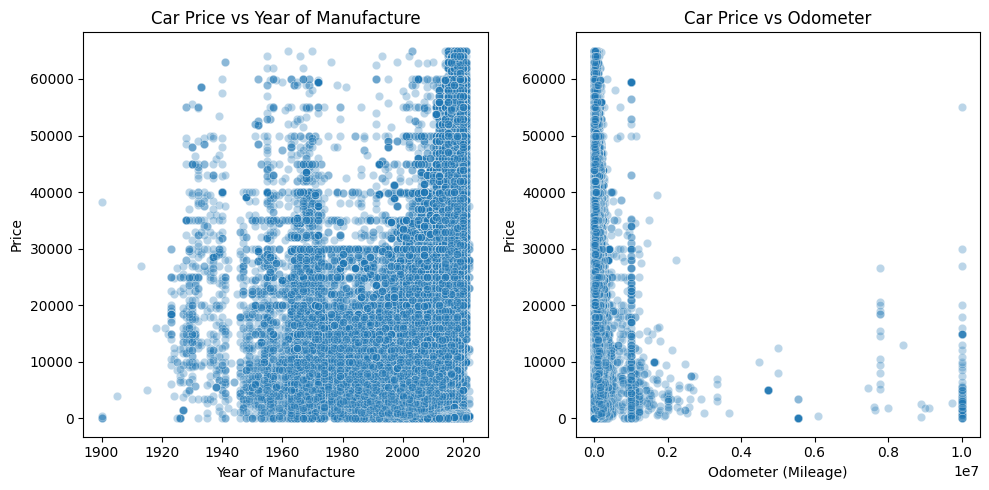

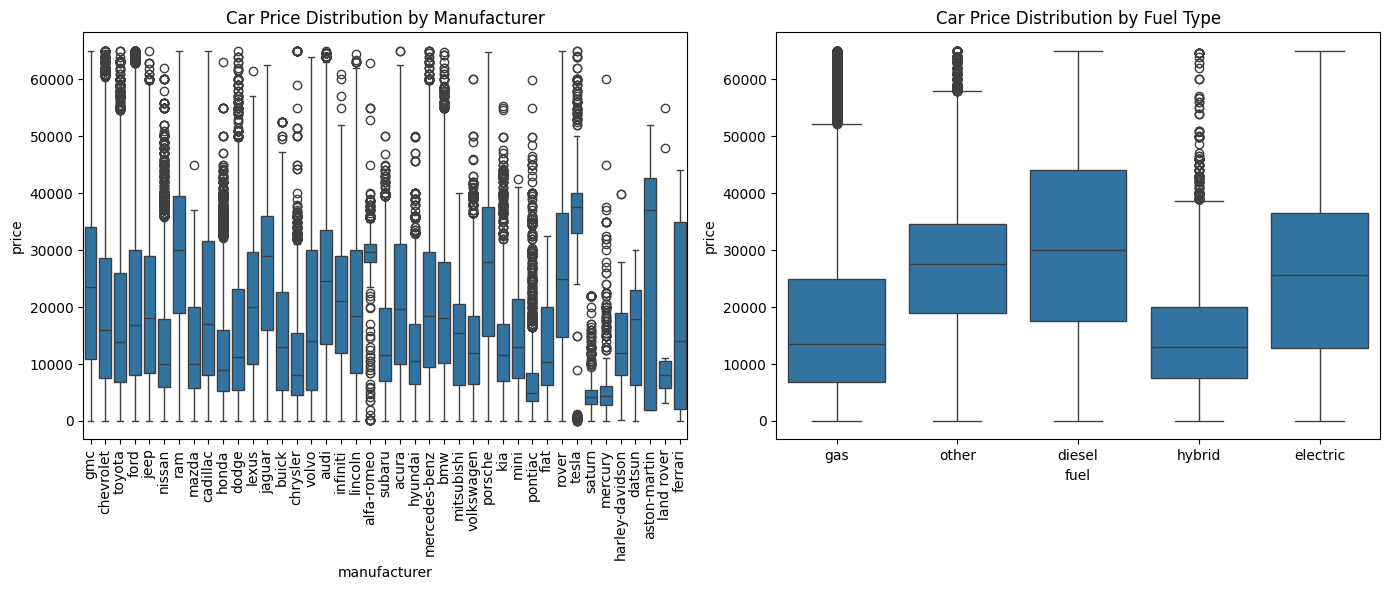

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\ryanb\Downloads\practical_application_II_starter (1)\data\vehicles.csv'
vehicles_df = pd.read_csv(file_path)

# Remove columns with more than 30% missing data
missing_data = vehicles_df.isnull().mean().sort_values(ascending=False)
columns_to_drop = missing_data[missing_data > 0.30].index
vehicles_cleaned = vehicles_df.drop(columns=columns_to_drop)

# Drop rows with missing essential values: 'price', 'year', 'manufacturer', 'model', 'odometer'
essential_columns = ['price', 'year', 'manufacturer', 'model', 'odometer']
vehicles_cleaned = vehicles_cleaned.dropna(subset=essential_columns)

# Convert 'year' to an integer for better clarity in visualizations
vehicles_cleaned['year'] = vehicles_cleaned['year'].astype(int)

# Removing outliers by focusing on more reasonable price range (e.g., 1st percentile to 99th percentile)
lower_bound = vehicles_cleaned['price'].quantile(0.01)
upper_bound = vehicles_cleaned['price'].quantile(0.99)

# Filtering the dataset to remove extreme outliers based on price
vehicles_filtered = vehicles_cleaned[(vehicles_cleaned['price'] > lower_bound) & (vehicles_cleaned['price'] < upper_bound)]

# Plotting scatter plots for numerical variables like year and odometer
plt.figure(figsize=(10, 5))

# Plot: Price vs Year of Manufacture
plt.subplot(1, 2, 1)
sns.scatterplot(x='year', y='price', data=vehicles_filtered, alpha=0.3)
plt.title('Car Price vs Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price')

# Plot: Price vs Odometer
plt.subplot(1, 2, 2)
sns.scatterplot(x='odometer', y='price', data=vehicles_filtered, alpha=0.3)
plt.title('Car Price vs Odometer')
plt.xlabel('Odometer (Mileage)')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

# Plotting box plots for categorical variables like manufacturer and fuel type to compare prices
plt.figure(figsize=(14, 6))

# Boxplot: Price vs Manufacturer
plt.subplot(1, 2, 1)
sns.boxplot(x='manufacturer', y='price', data=vehicles_filtered)
plt.xticks(rotation=90)
plt.title('Car Price Distribution by Manufacturer')

# Boxplot: Price vs Fuel Type
plt.subplot(1, 2, 2)
sns.boxplot(x='fuel', y='price', data=vehicles_filtered)
plt.title('Car Price Distribution by Fuel Type')

plt.tight_layout()
plt.show()
